In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import sklearn.linear_model as lm
from keras.models import Sequential,load_model
from keras.layers import Dense,Reshape,advanced_activations
from keras.constraints import nonneg
import numpy as np
%matplotlib inline
import tensorflow
import keras
import math
import time
import datetime
from sklearn import cluster, datasets, metrics
import warnings
from mpl_toolkits.mplot3d import Axes3D

Using TensorFlow backend.


In [2]:
import sys
default_stdout = sys.stdout
default_stderr = sys.stderr
reload(sys)
sys.stdout = default_stdout
sys.stderr = default_stderr
sys.setdefaultencoding('utf-8')

In [3]:
##############
#先讀取檔案nh.csv
##############


dfnh = pd.read_csv('nh.csv')
#  we use pandas to read our sample
dfnhc =dfnh.copy()
# copy it for further use
    
### this is checking and ploting

# alweneed =(dfnhc['當量'].mean()+(dfnhc['當量'].std())*4) # to see what mean+std*4
# dfnhc['當量'].where(dfnhc['當量']<=alweneed,alweneed, inplace=True) # move outliers to mean+std*4
# dfnhc['當量'].plot() #plot it
# 把VD編號變成 0-50的數字


dfnhcg=dfnhc.set_index(['VD編號','方向']).index.unique().tolist();dfnhcg
# 把VD編號跟方向變成Index，取出來變成list
dfvdd=pd.DataFrame(dfnhcg,columns=['a','b']);dfvdd
# 在把剛剛的list變成df column name =[a,b]
dfvdd['c']=dfvdd.index;dfvdd
# 新增一欄位C是預設index 0-50
dfvdd1=dfvdd.set_index(['a','b']);dfvdd1
#  把ab設成index
dfnhcri=dfnhc.set_index(['VD編號','方向']);dfnhcri
# 再把原始資料的VD編號及方向設成index
dfnhcri['sortby'] = None
# 新增一欄位sortby
x1 = dfnhcri['sortby']
x2 = dfvdd1['c']
# 把VD編號跟方向新增sortby 編號
x1.update(x2);x1
# 把編號更新到原來的DF上
dfnhcri['sortby']=x1.values
dfnhcris=dfnhcri.sort_values(['sortby','日期']);dfnhcris
# 重新 index 就成功拉
dfnhcris=dfnhcris.reset_index();



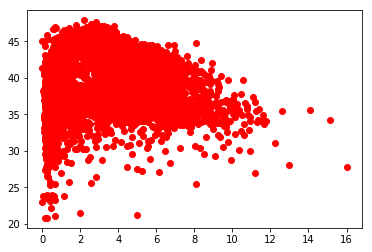

In [6]:
gf=dfnhcris.where((dfnhcris.sortby==42)).dropna().copy()
# # set pic size
# plt.figure()
# fig_size[0] = 12
# fig_size[1] = 9
# plt.rcParams["figure.figsize"] = fig_size
plt.plot(gf['平均佔有率'].values,gf['平均速度'].values,'ro')

In [53]:
gfc=gf.head(100).copy()
# gfc['當量'].to_frame()

In [54]:
eql,eqh=gfc['當量'].quantile([0.005,0.995]);
print eql,eqh

gfc['當量']=gfc['當量'].to_frame().apply(lambda x: x[(x>eql) & (x < eqh)]);gfc

64.7325 1056.105


,VD編號,方向,道路,位置,道路數,日期,時間,當量,平均速度,平均佔有率,平均車間距,星期,sortby
277838,VTHRR20,東,內湖路1段,西湖捷運站2號出口前路燈桿,2.0,2016-04-01,00:00:00,357.45760,38.338490,1.820000,112.009995,Fri,42
277839,VTHRR20,東,內湖路1段,西湖捷運站2號出口前路燈桿,2.0,2016-04-01,01:00:00,187.50000,35.916832,0.985000,112.485000,Fri,42
277840,VTHRR20,東,內湖路1段,西湖捷運站2號出口前路燈桿,2.0,2016-04-01,02:00:00,151.00000,34.209785,0.865000,108.640000,Fri,42
277841,VTHRR20,東,內湖路1段,西湖捷運站2號出口前路燈桿,2.0,2016-04-01,03:00:00,76.50000,33.180270,0.300000,65.435000,Fri,42
277842,VTHRR20,東,內湖路1段,西湖捷運站2號出口前路燈桿,2.0,2016-04-01,04:00:00,NaN,32.582256,0.260000,60.970000,Fri,42
277843,VTHRR20,東,內湖路1段,西湖捷運站2號出口前路燈桿,2.0,2016-04-01,05:00:00,68.00000,32.984154,0.435000,69.450000,Fri,42
277844,VTHRR20,東,內湖路1段,西湖捷運站2號出口前路燈桿,2.0,2016-04-01,06:00:00,77.00000,30.409039,0.450000,62.739998,Fri,42
277845,VTHRR20,東,內湖路1段,西湖捷運站2號出口前路燈桿,2.0,2016-04-01,07:00:00,229.50000,40.335700,1.300000,119.935000,Fri,42
277846,VTHRR20,東,內湖路1段,西湖捷運站2號出口前路燈桿,2.0,2016-04-01,08:00:00,624.00000,44.357650,3.400000,98.270004,Fri,42
277847,VTHRR20,東,內湖路1段,西湖捷運站2號出口前路燈桿,2.0,2016-04-01,09:00:00,919.00000,42.043335,6.145000,85.860000,Fri,42


In [16]:
gf.where((gf['平均佔有率']>gf['平均佔有率'].mean()+gf['平均佔有率'].std()*3)).dropna()
gfc=gf.ix[:,8:10].copy();gfc.columns=['speed','accu'];

In [6]:
from __future__ import print_function
import patsy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg

data = gfc
data.head()

,speed,accu
79465,55.830475,1.480
79466,55.889427,0.760
79467,52.020360,0.395
79468,57.930954,0.265
79469,60.668750,0.325


In [10]:
mod = smf.quantreg('speed ~ accu', data)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  speed   Pseudo R-squared:               0.2733
Model:                       QuantReg   Bandwidth:                      0.9156
Method:                 Least Squares   Sparsity:                        8.428
Date:                Thu, 23 Feb 2017   No. Observations:                 6163
Time:                        15:03:34   Df Residuals:                     6161
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.1900      0.068    797.559      0.000      54.057      54.323
accu          -0.7371      0.008    -95.488      0.000      -0.752      -0.722


In [13]:
quantiles = [0.005,0.5,0.995];quantiles
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['accu']] + res.conf_int().ix['accu'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('speed ~ accu', data).fit()
ols_ci = ols.conf_int().ix['accu'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['accu'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

       q           a         b        lb        ub
0  0.005   23.993116 -0.133052 -0.797552  0.531449
1  0.500   54.190039 -0.737070 -0.752202 -0.721938
2  0.995  146.096306 -2.387099 -5.639662  0.865464
{'a': 55.281138394051773, 'b': -0.80508716551071569, 'lb': -0.8443802940848718, 'ub': -0.7657940369365596}


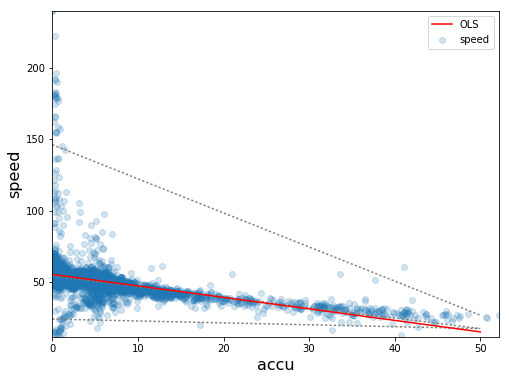

In [14]:
x = np.arange(data.accu.min(), data.accu.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(data.accu, data.speed, alpha=.2)
ax.set_xlim((data.accu.min(), data.accu.max()))
ax.set_ylim((data.speed.min(), data.speed.max()))
legend = ax.legend()
ax.set_xlabel('accu', fontsize=16)
ax.set_ylabel('speed', fontsize=16);


                         QuantReg Regression Results                          
Dep. Variable:                  speed   Pseudo R-squared:               0.2865
Model:                       QuantReg   Bandwidth:                      0.8924
Method:                 Least Squares   Sparsity:                        8.159
Date:                Thu, 23 Feb 2017   No. Observations:                 6163
Time:                        15:36:20   Df Residuals:                     6160
                                        Df Model:                            2
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         55.0584      0.086    643.425      0.000      54.891      55.226
accu              -1.0052      0.019    -52.033      0.000      -1.043      -0.967
I(accu ** 2.0)     0.0083      0.001     15.613      0.000       0.007       0.009


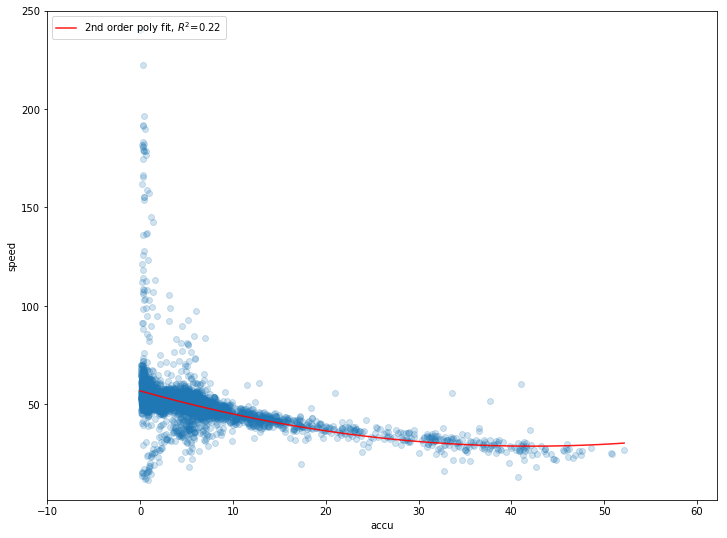

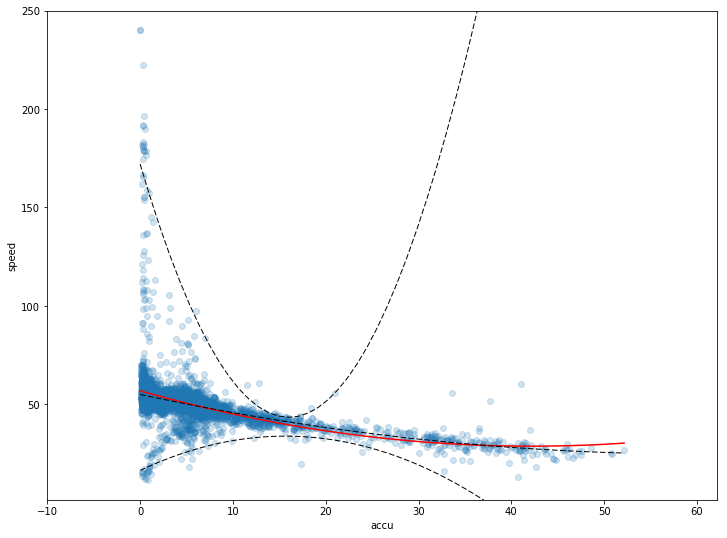

In [32]:
df = gfc
x, y= df.accu.values,df.speed.values


x1 = pd.DataFrame({'accu': np.linspace(df.accu.min(), df.accu.max(), 200)})

poly_2 = smf.ols(formula='speed ~ 1 + accu + I(accu ** 2.0)', data=df).fit()
plt.plot(x, y, 'o', alpha=0.2)
plt.plot(x1.accu, poly_2.predict(x1), 'r-', 
         label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)
plt.xlim((gfc.accu.min()-10, gfc.accu.max()+10))
plt.ylim((gfc.speed.min()-10, gfc.speed.max()+10))
plt.xlabel('accu')
plt.ylabel('speed')
plt.legend(loc="upper left")


# with quantile regression

# Least Absolute Deviation
# The LAD model is a special case of quantile regression where q=0.5

mod = smf.quantreg('speed ~ accu + I(accu ** 2.0)', df)
res = mod.fit(q=.5)
print(res.summary())

# Quantile regression for 3 quantiles

quantiles = [.005, .50, .995]

# get all result instances in a list
res_all = [mod.fit(q=q) for q in quantiles]

res_ols = smf.ols('speed ~ accu + I(accu ** 2.0)', df).fit()

# set pic size
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size


plt.figure()

# create x for prediction
x_p = np.linspace(df.accu.min(), df.accu.max(), 50)
df_p = pd.DataFrame({'accu': x_p})

for qm, res in zip(quantiles, res_all):
    # get prediction for the model and plot
    # here we use a dict which works the same way as the df in ols
    plt.plot(x_p, res.predict({'accu': x_p}), linestyle='--', lw=1, 
             color='k', label='q=%.2F' % qm, zorder=2)

y_ols_predicted = res_ols.predict(df_p)
plt.plot(x_p, y_ols_predicted, color='red', zorder=1)

plt.plot(df.accu, df.speed, 'o', alpha=.2, zorder=0)
plt.xlim((gfc.accu.min()-10, gfc.accu.max()+10))
plt.ylim((gfc.speed.min()-10, gfc.speed.max()+10))

plt.xlabel('accu')
plt.ylabel('speed')
plt.title('')
plt.show()

In [45]:
gf.quantile([.005, .995])
# gf['平均佔有率'].quantile(.005)

,道路數,當量,平均速度,平均佔有率,平均車間距
0.005,2.0,21.00,22.005203,0.140,56.48715
0.995,2.0,2296.94,129.598915,41.853,250.00000


In [35]:
gf.where((gf['平均速度']<25)&(gf['平均佔有率']<2.5)).dropna()

,VD編號,方向,道路,位置,道路數,日期,時間,當量,平均速度,平均佔有率,平均車間距,星期,sortby
80262,VQRTE00,北,舊宗路2段,舊宗路二段121巷口左側人行道上,2.0,2016-05-07,06:00:00,409.500000,17.690050,0.975,230.27000,Sat,12
80738,VQRTE00,北,舊宗路2段,舊宗路二段121巷口左側人行道上,2.0,2016-06-03,00:00:00,766.500000,19.303383,1.480,213.12500,Fri,12
81127,VQRTE00,北,舊宗路2段,舊宗路二段121巷口左側人行道上,2.0,2016-06-19,06:00:00,351.500000,15.070233,0.625,246.60000,Sun,12
81296,VQRTE00,北,舊宗路2段,舊宗路二段121巷口左側人行道上,2.0,2016-06-26,07:00:00,448.474580,20.427423,1.110,229.14000,Sun,12
81415,VQRTE00,北,舊宗路2段,舊宗路二段121巷口左側人行道上,2.0,2016-07-01,06:00:00,407.500000,18.530607,0.920,232.99500,Fri,12
81463,VQRTE00,北,舊宗路2段,舊宗路二段121巷口左側人行道上,2.0,2016-07-03,06:00:00,362.500000,12.558579,0.630,243.12500,Sun,12
81607,VQRTE00,北,舊宗路2段,舊宗路二段121巷口左側人行道上,2.0,2016-07-09,06:00:00,341.500000,12.170568,0.560,245.95001,Sat,12
81751,VQRTE00,北,舊宗路2段,舊宗路二段121巷口左側人行道上,2.0,2016-07-15,06:00:00,396.500000,16.943342,0.890,239.54501,Fri,12
82862,VQRTE00,北,舊宗路2段,舊宗路二段121巷口左側人行道上,2.0,2016-09-05,02:00:00,332.000000,13.823804,0.450,247.13000,Mon,12
83050,VQRTE00,北,舊宗路2段,舊宗路二段121巷口左側人行道上,2.0,2016-09-13,06:00:00,402.000000,16.163403,0.930,240.55000,Tue,12


In [27]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
print (fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

[6.0, 4.0]
